## TP 2: Analyse des erreurs

Dans ce TP, nous allons d'abord analyser les erreurs d'interpolation de la méthode de Lagrange et comment elles dépendent du nombre de nœuds utilisés, de la position de ces nœuds, et de la fonction que nous essayons d'interpoler. Ensuite, nous nous intéresserons à l'arithmétique en virgule flottante et à l'analyse des erreurs numériques. 

## Exercice 1: Les erreurs d'interpolation

Soit $p_n(x)$ une approximation polynomiale de degré $n$ de la fonction $f$ sur l'intervalle $[a,b]$. L'erreur d'interpolation est alors définie comme suit:
$$
    \max_{x\in[a,b]} |p_n(x) - f(x)|.
$$
On commencera par implémenter une approximation de l'erreur d'interpolation ci-dessus.

### Exercise 1a)
---
> Implémenter une fonction `max_deviation(f, g, a, b)` qui estime l'erreur
$$
    \max_{x\in [a,b]} |f(x)-g(x)|
$$
> en évaluant les deux fonctions en de nombreux points dans l'intervalle $[a, b]$.
>
> **Remarque** La précision de cette fonction dépend du nombre de points d'évaluation. Si vous pensez que les exercices présentés plus loin dans ce Notebook prennent trop de temps à s'exécuter, essayez de diminuer le nombre de points (en veillant à ce que les tests passent toujours).
----

In [37]:
import numpy as np
import matplotlib.pyplot as plt


def max_deviation(f, g, a, b):
    """Renvoie la déviation maximale de f sur [a,b] par rapport à g"""
    # VOTRE CODE ICI
    points = np.linspace(a, b, 1000)
    max = 0
    for i in np.arange(len(points)):
        value = np.abs(f(points[i]) - g(points[i]))
        if (value > max):
            max = value
    return max

In [38]:
def test_max_deviation():
    f = np.sin
    g = np.cos
    max_dev = max_deviation(f, g, 0, np.pi)
    assert max_dev > 0, "La valeur de max_deviation doit être positive."
    error = np.abs(max_dev - np.sqrt(2))
    assert error < 1e-2, "La valeur de max_deviation n'est pas correcte."
    assert error < 1e-6, "Rendre votre méthode plus précise."

    def sin_taylor(x):
        """Renvoie l'expansion de Taylor de degré 9 de sin(x) autour de x=0"""
        return x - x**3 / 6 + x**5 / 120 - x**7 / 5040 + x**9 / 362880

    error = (
        max_deviation(np.sin, sin_taylor, -np.pi, np.pi) - 0.006925270707505013
    )
    assert error < 1e-6, "Rendre votre méthode plus précise."


test_max_deviation()


Dans le TP précédent, vous avez implémenté l'interpolation de Lagrange. Alors que nous pourrions vous demander de réutiliser les fonctions que vous avez implémentées la dernière fois, vous allez plutôt utiliser les méthodes d'interpolation implémentées dans Scipy.  On peut utiliser `BarycentricInterpolator` qui utilise l'interpolation de Lagrange barycentrique.


Son utilisation est la suivante : si `xi` et `yi = f(xi)` sont les valeurs que l'on veut utiliser pour construire le polynôme d'interpolation, alors on peut appeler

```python
    poly = BarycentricInterpolator(xi, yi)
```
Cela renvoie un objet qui stocke toutes les informations nécessaires pour évaluer le polynôme d'interpolation. On peut simplement appeler cet objet comme indiqué ci-dessous :
```python
    x = np.linspace(-1, 1, 10)
    poly(x)
```
Ci-dessous, on peut le voir en action pour l'interpolation de $f(x) = 1/(1+x^2)$ :

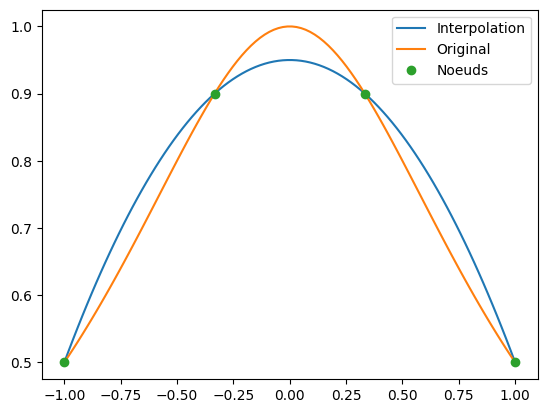

In [39]:
from scipy.interpolate import BarycentricInterpolator


def f(x):
    return 1 / (1 + x**2)


n_noeuds = 4
noeuds = np.linspace(-1, 1, n_noeuds)
valeurs = f(noeuds)
poly = BarycentricInterpolator(noeuds, valeurs)

plot_x = np.linspace(-1, 1, 100)
plot_y = poly(plot_x)
plt.plot(plot_x, plot_y, label="Interpolation")
plt.plot(plot_x, f(plot_x), label="Original")
plt.plot(noeuds, valeurs, "o", label="Noeuds")
plt.legend()
plt.show()


On souhaite maintenant étudier comment l'erreur d'interpolation évolue lorsque l'on augmente le nombre de nœuds d'interpolation. 

### Exercice 1b) i)
----
> Implémentez une fonction `interpolation_error_equidistant(f, a, b, n)` qui estime l'erreur d'interpolation
$$
    \max_{x\in[a,b]} |p_n(x)-f(x)|
$$
> où $p_n(x)$ est le polynôme d'interpolation de degré $n$ obtenu en utilisant la formule de Lagrange barycentrique avec des nœuds d'interpolation équidistants.
> Vous devrez utiliser la fonction `max_deviation` de l'exercice 1a).   
>
> **Attention:** Le polynôme d'interpolation $p_n(x)$ est de degré $n$, ce qui nécessite $n+1$ nœuds d'interpolation !
----


In [40]:
def interpolation_error_equidistant(f, a, b, n):
    """
    Calcule l'erreur d'interpolation de degré n de f sur l'intervalle [a,b]
    en utilisant des noeuds équidistants.
    """
    # VOTRE CODE ICI
    noeuds = np.linspace(a, b, n + 1)
    valeurs = f(noeuds)
    poly = BarycentricInterpolator(noeuds, valeurs)
    return max_deviation(f, poly, a, b)


In [41]:
def test_interpolation_error_equidistant():
    error4 = interpolation_error_equidistant(np.sin, -1, 1, 4)
    error9 = interpolation_error_equidistant(np.sin, -1, 1, 9)
    assert error4 > 0, "L'erreur doit être positive"
    assert error9 > 0, "L'erreur doit être positive"
    assert error4 > error9, "L'erreur devrait diminuer avec n pour les petits n"
    error4_correct = 0.0009031431406134605
    assert (
        abs(error4 - error4_correct) / error4_correct < 1e-2
    ), "L'erreur n'est pas correcte"
    error9_correct = 2.902040829866337e-10
    assert (
        abs(error9 - error9_correct) / error9_correct < 1e-2
    ), "L'erreur n'est pas correcte"

    error19 = interpolation_error_equidistant(np.exp, 5, 10, 19)
    assert (
        1e-06 > error19 > 1e-10
    ), "Assurez-vous que vous prenez correctement en compte l'intervalle [a,b]."


test_interpolation_error_equidistant()


Text(0.5, 0, "Degré n du polynôme d'interpolation")

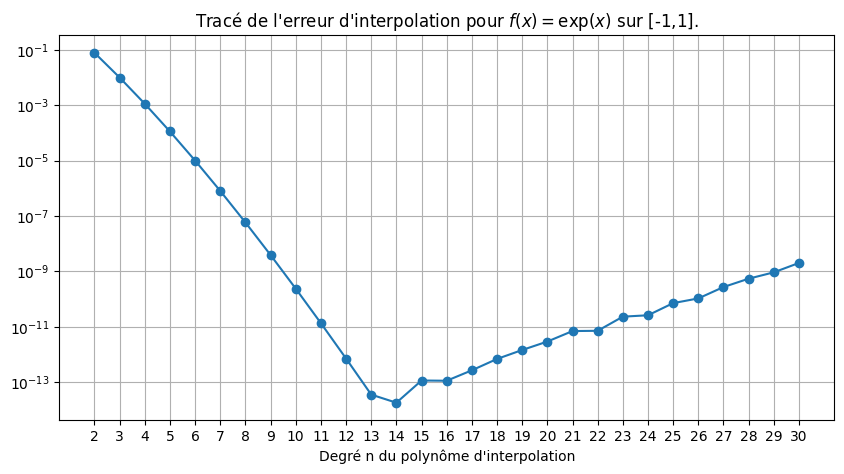

In [42]:
plt.figure(figsize=(10, 5))
plt.title("Tracé de l'erreur d'interpolation pour $f(x) = \exp(x)$ sur [-1,1].")

results = []
n_vals = np.arange(2, 31)
for n in n_vals:
    results.append(interpolation_error_equidistant(np.exp, -1, 1, n))
plt.plot(n_vals, results, "o-")

plt.xticks(n_vals)
plt.yscale("log")
plt.grid()
plt.xlabel("Degré n du polynôme d'interpolation")


> **Réflexion** : Pourquoi l'erreur descend-elle d'abord et remonte-t-elle ensuite ?

 Cela est dû à l'${\epsilon}_{machine}$: dès qu'on a une erreur s'approchant de l'epsilon machine, la précision de la machine entre en jeu et on ne pourra pas avoir des résultats plus précis que ce que la machine peut permettre.

Bien que simple, vous avez vu que les nœuds d'interpolation équidistants ne sont pas les meilleurs. Au lieu de cela, l'utilisation des nœuds de Chebyshev est généralement privilégiée. Rappelons que les points d'interpolation de Chebyshev pour l'intervalle $[-1,1]$ sont donnés par:
$$
    x_k = \cos\left(\frac{2k+1}{2n}\pi\right),\qquad k=0,\dots,n-1.
$$
Pour obtenir les nœuds de Chebyshev dans l'intervalle $[a,b]$, on peut appliquer une transformation affine.

### Exercice 1b) ii)
> Implémentez une fonction `interpolation_error_chebyshev(f, a, b, n)` qui estime l'erreur d'interpolation
$$
    \max_{x\in[a,b]} |p_n(x)-f(x)|
$$
> où $p_n(x)$ est le polynôme d'interpolation de degré $n$ obtenu en utilisant les noeuds d'interpolation de Chebyshev.  
----

In [82]:
def chebyshev_noeuds(a, b, n):
    """Renvoie les n noeuds de Chebyshev sur [a,b]"""
    # VOTRE CODE ICI
    x = []
    for i in np.arange(n):
        x.append(((b + a) / 2) + ((b - a)/2) * np.cos((2 * i + 1)/(2 * n + 2)) * np.pi)
    return x


def interpolation_error_chebyshev(f, a, b, n):
    """
    Calcule l'erreur d'interpolation de degré n de f sur l'intervalle [a,b] en
    utilisant des noeuds de Chebyshev.
    """
    # VOTRE CODE ICI
    noeuds = chebyshev_noeuds(a, b, n + 1)
    valeurs = f(noeuds)
    poly = BarycentricInterpolator(noeuds, valeurs)
    return max_deviation(f, poly, a, b)


In [83]:
def test_interpolation_error_chebyshev():
    error4 = interpolation_error_chebyshev(np.sin, -1, 1, 4)
    error9 = interpolation_error_chebyshev(np.sin, -1, 1, 9)
    assert error4 > 0, "L'erreur doit être positive"
    assert error9 > 0, "L'erreur doit être positive"
    assert error4 > error9, "L'erreur devrait diminuer avec n pour les petits n"
    error4_correct = 0.0005043855644989437
    error9_correct = 4.784317386707926e-11
    assert (
        abs(error4 - error4_correct) / error4_correct < 1e-2
    ), "L'erreur n'est pas correcte"
    assert (
        abs(error9 - error9_correct) / error9_correct < 1e-2
    ), "L'erreur n'est pas correcte"

    error19 = interpolation_error_chebyshev(np.exp, 5, 10, 19)
    assert (
        1e-08 > error19 > 1e-12
    ), "Assurez-vous que vous prenez correctement en compte l'intervalle [a,b]."


test_interpolation_error_chebyshev()


AssertionError: L'erreur n'est pas correcte

Nous traçons ci-dessous l'erreur d'interpolation pour $f=\exp$ sur l'intervalle [-1,1] en utilisant des noeuds d'interpolation équidistants et de Chebyshev.
> **Réflexion** : Pour les petits $n$, les noeuds de Chebyshev sont un peu meilleurs que les noeuds équidistants. Pour des $n$ plus grands, l'erreur devient pire pour les noeuds équidistants, mais reste à peu près la même pour les noeuds Chebyshev. Comment cela se fait-il ?

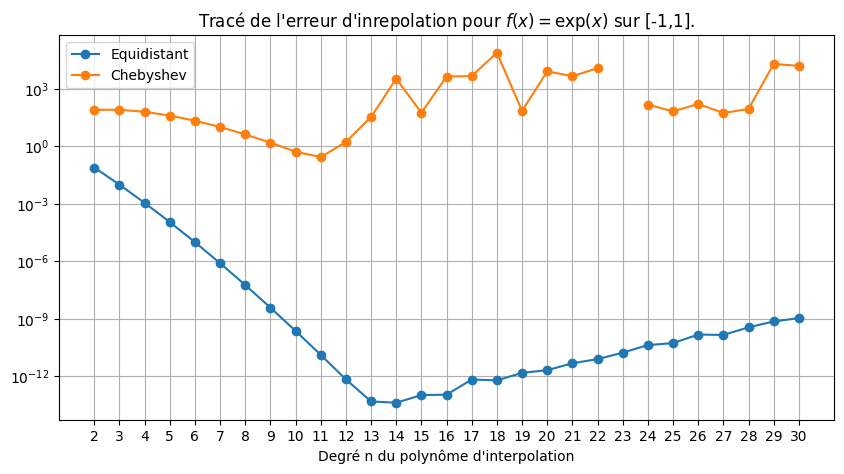

In [84]:
plt.figure(figsize=(10, 5))
plt.title("Tracé de l'erreur d'inrepolation pour $f(x) = \exp(x)$ sur [-1,1].")

errors = []
n_vals = np.arange(2, 31)
for n in n_vals:
    errors.append(interpolation_error_equidistant(np.exp, -1, 1, n))
plt.plot(n_vals, errors, "o-", label="Equidistant")

errors = []
n_vals = np.arange(2, 31)
for n in n_vals:
    errors.append(interpolation_error_chebyshev(np.exp, -1, 1, n))
plt.plot(n_vals, errors, "o-", label="Chebyshev")

plt.xticks(n_vals)
plt.yscale("log")
plt.xlabel("Degré n du polynôme d'interpolation")
plt.grid()
plt.legend()
plt.show()


L'erreur d'interpolation pour des points équidistants est bornée par
$$
    \max_{x\in[a,b]}|p_n(x)-f(x)| \leq b_{\text{equi}} = \max_{x\in[a,b]}|f^{(n+1)}(x)|\frac{1}{4(n+1)} \left(\frac{b-a}n\right)^{n+1}.
$$
Pour les noeuds de Chebyshev, la borne est
$$
    \max_{x\in[a,b]}|p_n(x)-f(x)| \leq b_{\text{Cheby}} = \max_{x\in[a,b]}|f^{(n+1)}(x)| \left(\frac{(b-a)^{n+1}}{2^{2n+1}(n+1)!}\right).
$$
On étudiera la précision de ces limites en pratique. Mais d'abord, pour éviter de calculer les dérivées à la main, on verra comment utiliser le module Python `sympy` pour calculer les dérivées.

`sympy` est un module Python pour l'algèbre symbolique. Tout comme Maple, il peut faire des choses comme intégrer, différencier ou résoudre des expressions symboliques. Pour l'instant, on va juste voir comment il peut être utilisé pour calculer les dérivées de fonctions simples. 

Si on importe `x` de `sympy.abc`, alors la variable `x` est interprétée comme un symbole. On peut former des expressions avec ce symbole :

In [73]:
from sympy.abc import x

poly = x**2 + 15 * x - 1
poly


x**2 + 15*x - 1

On peut différencier les expressions en utilisant `sympy.diff` comme ceci :

In [74]:
import sympy

sympy.diff(poly, x)


2*x + 15

On ne veut pas seulement une expression symbolique des dérivées des fonctions, on a aussi besoin d'évaluer ces dérivées en de nombreux points. On peut faire cela en utilisant la function `subs` (`poly_der2.subs(x, 1)` pour évaluer la fonction en $1$). Si nous souhaitons évaluer la fonction en de nombreux points, il est plus naturel de transformer l'expression `sympy` en une fonction qui peut accepter des arrays `numpy`, à l'aide de la fonction `sympy.lambdify` comme ceci :

In [75]:
from sympy.abc import x
import sympy

poly = x**10 - x**5 + 16
poly_der2 = sympy.diff(poly, x, 2)  # deuxième dérivée
f = sympy.lambdify(x, poly_der2, "numpy")  # convertir en fonction numpy
f(np.linspace(-1, 1, 10))


array([ 1.10000000e+02,  2.14629177e+01,  4.24605512e+00,  7.54458162e-01,
        2.74369330e-02, -2.74327515e-02, -7.27023320e-01, -2.61265544e+00,
        2.64261591e+00,  7.00000000e+01])

### Exercice 1c) i)
----
> Ecrivez une fonction `nder(expr, n)` qui prend une expression `sympy` qui dépend de `x` en entrée, et sort la `n`ième dérivée sous forme de fonction `numpy`. Ecrivez ensuite les fonctions `b_equidistant(f, a, b, n)` et `b_chebyshev(f, a, b, n)` qui calculent respectivement les bornes d'erreur d'interpolation $b_{\text{equi}}$ et $b_{\text{Cheby}}$.
>
> Faites attention à votre implémentation de `b_chebyshev` ; vous devrez peut-être réarranger les termes de la formule pour éviter d'avoir des fractions dont le numérateur et le dénominateur sont tous deux très grands. 
----

In [76]:
def nder(expr, n):
    """Calcule la nième dérivée de expr comme fonction numpy"""
    # VOTRE CODE ICI
    n_derivee = sympy.diff(expr, x, n)
    return sympy.lambdify(x, n_derivee, "numpy")


def b_equidistant(f, a, b, n):
    """
    Calcule les bornes d'erreur pour l'interpolation de Lagrange équidistante.

     - L'interpolation est effectuée sur l'intervalle [a,b].
     - f est une expression sympy
     - n est le degré du polynôme d'interpolation
    """
    # VOTRE CODE ICI
    derivee = nder(f, n + 1)
    value = (1/(4 * (n + 1))) * ((b - a)/n)**n + 1
    return value * np.max(derivee(np.linspace(a, b, 100)))


def b_chebyshev(f, a, b, n):
    from scipy.special import factorial
    """
    Calcule les bornes d'erreur pour l'interpolation de Lagrange Chebyshev.

     - L'interpolation est effectuée sur l'intervalle [a,b].
     - f est une expression sympy
     - n est le degré du polynôme d'interpolation
    """
    # VOTRE CODE ICI
    derivee = nder(f, n + 1)
    value = ((b - a)**(n + 1))/((2**(2 * n + 1)) * factorial(n + 1))
    return value * np.max(derivee(np.linspace(a, b, 100)))



In [85]:
def test_nder():
    from sympy.abc import x

    poly = x**2 + 15 * x - 1
    x_samples = np.linspace(-1, 1, 10)
    deriv1 = nder(poly, 1)
    assert np.allclose(
        deriv1(x_samples), 2 * x_samples + 15
    ), "La dérivée n'est pas correcte"
    deriv2 = nder(poly, 2)
    assert np.allclose(
        deriv2(x_samples), 2 * np.ones_like(x_samples)
    ), "La dérivée n'est pas correcte"
    deriv3 = nder(poly, 3)
    assert np.allclose(
        deriv3(x_samples), np.zeros_like(x_samples)
    ), "La dérivée n'est pas correcte"

    func = sympy.sin(x)
    deriv101 = nder(func, 101)
    assert np.allclose(
        deriv101(x_samples), np.cos(x_samples)
    ), "La dérivée n'est pas correcte"


def test_b_equidistant():
    expr = sympy.sin(x) ** 2
    error = b_equidistant(expr, -1, 1, 5)
    assert error > 0, "L'erreur doit être positive"
    correct_error = 0.005461333332241047
    assert (
        abs(error - correct_error) / correct_error < 1e-2
    ), "L'erreur n'est pas correcte"

    expr = sympy.cos(x) - 2 * sympy.sin(x)
    error = b_equidistant(expr, -np.pi, np.pi, 7)
    assert error > 0, "L'erreur doit être positive"
    correct_error = 0.02944351467839892
    assert (
        abs(error - correct_error) / correct_error < 1e-2
    ), "L'erreur n'est pas correcte"


def test_b_chebyshev():
    expr = sympy.sin(x) ** 2
    error = b_chebyshev(expr, -1, 1, 5)
    assert error > 0, "L'erreur doit être positive"
    correct_error = 0.0013888888886111055
    assert (
        abs(error - correct_error) / correct_error < 1e-2
    ), "L'erreur n'est pas correcte"

    expr = sympy.cos(x) - 2 * sympy.sin(x)
    error = b_chebyshev(expr, -np.pi, np.pi, 7)
    assert error > 0, "L'erreur doit être positive"
    correct_error = 0.004111056926946459
    assert (
        abs(error - correct_error) / correct_error < 1e-2
    ), "L'erreur n'est pas correcte"


test_nder()
test_b_equidistant()
test_b_chebyshev()


AssertionError: L'erreur n'est pas correcte

On trace ci-dessous les erreurs d'interpolation pour $f=\exp$ sur l'intervalle [-1,1] pour les noeuds équidistants et de Chebyshev, ainsi que les bornes théoriques respectives. 


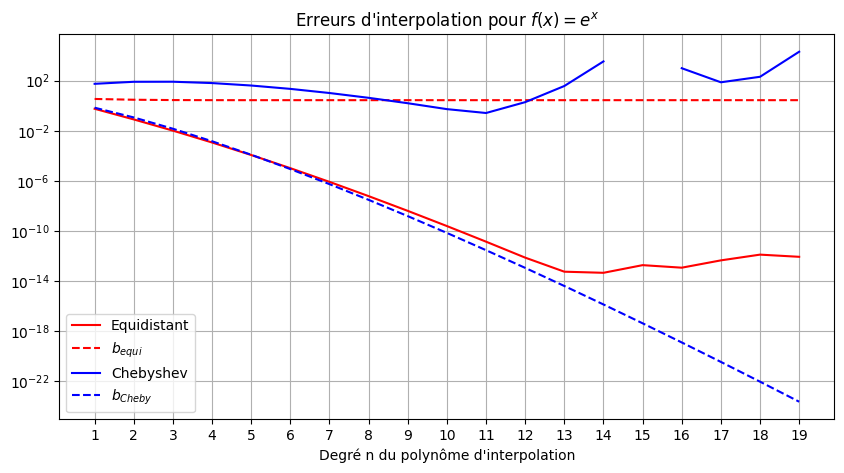

In [86]:
def interpolation_error_comparison(expr, a, b, n_max):
    plt.figure(figsize=(10, 5))
    func_numpy = sympy.lambdify(x, expr, "numpy")
    n_vals = np.arange(1, n_max)

    # Equidistant
    erreurs_vrais = []
    erreurs_theoriques = []
    for n in n_vals:
        erreurs_vrais.append(
            interpolation_error_equidistant(func_numpy, -1, 1, n)
        )
        erreurs_theoriques.append(b_equidistant(expr, -1, 1, n))
    plt.plot(n_vals, erreurs_vrais, "-", c="r", label="Equidistant")
    plt.plot(n_vals, erreurs_theoriques, "--", c="r", label="$b_{equi}$")

    # Chebyshev
    erreurs_vrais = []
    erreurs_theoriques = []
    for n in n_vals:
        erreurs_vrais.append(
            interpolation_error_chebyshev(func_numpy, -1, 1, n)
        )
        erreurs_theoriques.append(b_chebyshev(expr, -1, 1, n))
    plt.plot(n_vals, erreurs_vrais, "-", c="b", label="Chebyshev")
    plt.plot(n_vals, erreurs_theoriques, "--", c="b", label="$b_{Cheby}$")

    plt.title(f"Erreurs d'interpolation pour $f(x) = {sympy.latex(expr)}$")
    x_ticks = n_vals
    if len(x_ticks) > 25:
        x_ticks = x_ticks[:: len(x_ticks) // 20]
    plt.xticks(x_ticks)
    plt.yscale("log")
    plt.xlabel("Degré n du polynôme d'interpolation")
    plt.legend()
    plt.grid()


interpolation_error_comparison(sympy.exp(x), -1, 1, 20)


### Exercice 1c) ii)
> Utilisez `interpolation_error_comparison` pour réaliser des tracés similaires pour les fonctions $1/(1+x^2)$ et $\sin(x)$. 
> - Observez-vous une différence dans la vitesse de décroissance de l'erreur entre ces deux fonctions ? Pourquoi ?
> - Finalement, l'erreur d'interpolation devient pire que la borne théorique, à la fois pour les noeuds d'interpolation équidistants et de Chebyshev. Pourquoi la valeur de $n$ à laquelle cela se produit diffère-t-elle entre ces deux fonctions ?
>
> **Remarque** : Si le temps d'exécution est très long, changez votre fonction `max_deviation` de l'exercice 1a) pour qu'elle soit moins coûteuse à calculer.

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

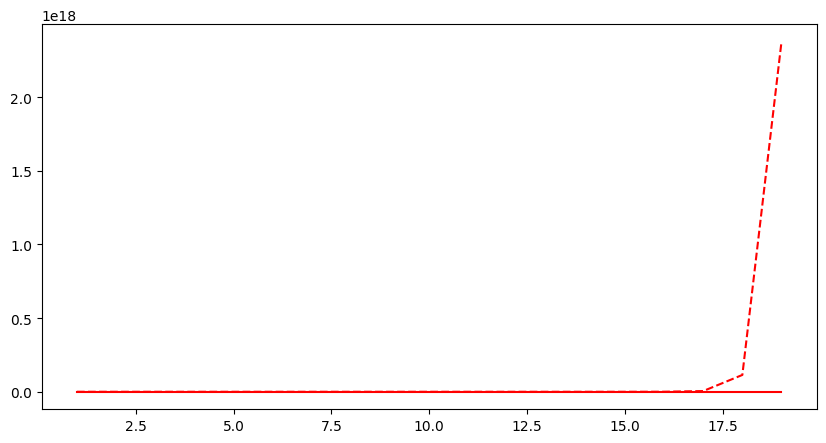

In [97]:
# VOTRE CODE ICI
poly = 1/(1 + x ** 2)

interpolation_error_comparison(poly, -1, 1, 20)
interpolation_error_comparison(sympy.sin(x), -1, 1, 20)


### Exercice 1d)
> On considère l'erreur d'interpolation pour les noeuds de Chebyshev. Si une fonction $f$ est $k$ fois différentiable, alors
$$
    \max_{x\in[a,b]}|p_n(x)-f(x)| \leq C_k n^{-k}
$$
> où $C_k>0$ est une constante indépendante de $n$. Nous allons confirmer cette relation numériquement.
>
> Pour $f_1(x) = |x|$, $f_2(x) = |\sin(5x)|^3$ :
> - Tracez l'erreur d'interpolation en utilisant les noeuds de Chebyshev sur l'intervalle $[-1,1]$ pour $n=1,\dots,100$.   
> - Si $f_i$ est $k$ fois différentiable, alors tracez $n^{-k}$ dans le même graphe.  
> - L'erreur d'interpolation a-t-elle la même pente que $n^{-k}$ ? 
> - Utilisez une échelle log-log en utilisant `plt.loglog()` pour mieux voir cette relation.
> - Assurez-vous d'ajouter une légende et un titre, et d'utiliser les options de traçage pour rendre le tracé plus clair.

In [ ]:
# VOTRE CODE ICI


**Reflexion** : L'erreur d'interpolation semble former deux lignes parallèles, en effet elle alterne entre de plus grandes et de plus petites valeurs. Comment cela se fait-il ?

## Exercice 2: Introduction à l’analyse des erreurs d’arrondi

Les nombres à virgule flottante dans numpy sont par défaut représentés sur 64 bits, mais on peut aussi les représenter sur 32 bits. Il existe aussi des formats pour les nombres à virgule flottante moins courants comme 16 bits et 128 bits, mais ils ne sont que partiellement supportés par numpy. Rappelez-vous que tous éléments des arrays de numpy ont un type de données, qui est stocké dans `.dtype`:

In [ ]:
import numpy as np

A = np.linspace(-1, 1, 10)
A.dtype


Pour créer un array avec un `dtype` donné, nous pouvons utiliser le paramètre `dtype`. On peut aussi appeler `.astype()` sur n'importe quel array numpy pour convertir tous ses éléments à un type différent. Notez que si nous convertissons de 64 à 32 bits par exemple, il y a bien sûr une perte de précision.

In [ ]:
A = np.linspace(-1, 1, 10, dtype=np.float32)
print(A.dtype)

A = np.linspace(-1, 1, 10).astype(np.float32)
print(A.dtype)


Il existe également plusieurs formats pour les nombres entiers. Par exemple, `int32` encode les entiers sur 32 bits, c'est-à-dire cet entier peut prendre une valeur comprise dans l'intervalle $[-2^{31},\dots,2^{31}-1]$. Les arrays de nombres entiers peuvent être convertis en arrays de nombres à virgule et inversement (faites attention aux arrondis).

In [ ]:
A = np.linspace(-1, 1, 11)
print(A)
A.astype(np.int32)


Pour trouver des informations sur un nombre à virgule flottante, on peut utiliser `np.finfo`. Celui-ci renvoie un objet qui stocke des informations utiles sur le format de ce nombre. Par exemple, l'attribut `.eps` de cet objet renvoie l'epsilon machine pour le format de nombre à virgule flottante donné:

In [ ]:
f64_info = np.finfo(np.float64)
f64_info.eps


### Exercise 2a)
----
> Utilisez `np.finfo` pour imprimer les informations suivantes sur le type de données `float32` :
> - L'epsilon de la machine
> - Le plus petit nombre positif normalisé
> - Le plus grand nombre positif
> 
> Lisez [la documentation](https://numpy.org/doc/1.21/reference/generated/numpy.finfo.html) pour trouver les attributs appropriés.
----

In [ ]:
# VOTRE CODE ICI


Rappelez-vous que, par l'exemple 2.2 du cours, les nombres à virgule flottante normalisés de 32 bits ont la forme suivante :
$$
    \tilde x = (-1)^s\times 1.m\times 2^{e-127}
$$
Où $s$ est le signe, $m$ est la mantisse et $e$ est l'exposant. Avec numpy, on peut extraire la mantisse et l'exposant en utilisant `np.frexp`, qui donne la mantisse et l'exposant sous une forme légèrement différente. Pour les nombres normalisés, la mantisse est soit entre $0.5$ et $1$, soit entre $-1$ et $-0.5$, alors que pour les nombres dénormalisés, la mantisse est entre $-0.5$ et $0.5$. L'exposant est un nombre entier $\leq 127$. Pour tous les nombres on a alors que $\tilde x = m\times 2^e$ (même les nombres dénormalisés). L'exception bien sûr sont les valeurs à virgule flottante `NaN`, $-\infty$ et $+\infty$.

Par exemple, on voit ci-dessous comment 10.0 est décomposé en une mantisse et un exposant.

In [ ]:
mantisse, exposant = np.frexp(10.0)
print(f"Mantisse: {mantisse}, exposant: {exposant}")
mantisse * 2**exposant


### Exercise 2b)
----
> Dans deux figures distinctes, tracez la mantisse et l'exposant des nombres à virgule flottante de 32 bits entre $10^{-50}$ et $10^{50}$. Placez l'exposant en base 10 sur l'axe horizontal.
>
> Que se passe-t-il lorsque les nombres à virgule flottante deviennent plus petits que le plus petit nombre normalisé ? Que se passe-t-il lorsqu'ils deviennent plus grands que le plus grand nombre représentable ? Cela correspond-il à ce qui devrait se passer avec la mantisse dans la spécification IEEE ?
> 
> Portez une attention particulière à l'axe horizontal des deux graphiques. Pourquoi y a-t-il une différence ?
> 
> Tapez vos réponses dans un commentaire ou une cellule markdown.
----

In [ ]:
# VOTRE CODE ICI


----
Lorsque l'on travaille avec des nombres à virgule flottante, des erreurs d'arrondi et des débordements peuvent se produire si l'on prend inutilement des fractions de très grands nombres. Par exemple :

In [ ]:
print(1.00 / 2.00)
nombre_grand = 10.0**308
print((1.00 * nombre_grand) / (2.00 * nombre_grand))


Si on choisit `nombre_grand` pour être encore plus grand, alors cela produit une erreur d'overflow. L'astuce consiste donc à éviter ces grandes fractions en simplifiant une expression. Il n'est pas toujours évident comment le faire. Considérons le cas particulier suivant de la formule du binôme de Newton :
$$
    1 = (1+1)^n/2^n = \sum_{k=0}^n \binom nk 2^{-n} \tag{$\star$}
$$
Si $n$ et $k$ sont très grands, alors chaque terme de cette somme est le produit d'un très grand et d'un très petit nombre, ce qui est une situation que nous aimerions éviter. On a ci-dessous une implémentation naïve de cette formule qui fonctionne bien pour $n=100$, mais pour $n=10\,000$ par exemple cela ne fonctionne pas (essayez !).

In [ ]:
from scipy.special import comb


def formule_naive(k, n):
    """
    Calcule le kième terme de la formule (*)

    - n est un nombre entier positif
    - k est soit un entier positif, soit un array numpy d'entiers positifs, tous
      inférieurs ou égaux à n.
    """
    return comb(n, k) / 2**n


n = 100
np.sum(formule_naive(np.arange(n + 1), n))


Nous pouvons résoudre ce problème d'overflow en prenant un logarithme :
$$
    \binom nk 2^{-n} = \exp\left( \log\left(\binom nk\right)-n\log 2\right)
$$
Cependant, il faut maintenant calculer le logarithme d'un coefficient binomial. Cela peut être fait en exprimant le coefficient binomial en termes de factorielles, puis d'utiliser la formule :
$$
    \log(n !) = \log\Gamma(n+1)
$$
Heureusement, $\log\Gamma$ peut être calculé en utilisant `scipy.special.loggamma`.

### Exercice 2c)
----
> Implémentez une fonction `formule_bon(n, k)` qui calcule le `k`ième terme de la somme $(\star)$ sans rencontrer de problèmes d'overflow même pour de très grandes valeurs de $n$ et $k$.
----

In [ ]:
from scipy.special import loggamma


def log_comb(n, k):
    """
    Calcul du logarithme du coefficient binomial

    - n est un nombre entier positif
    - k est soit un entier positif, soit un array numpy d'entiers positifs, tous
      inférieurs ou égaux à n.
    """
    # VOTRE CODE ICI


def formule_bon(k, n):
    """
    Calcule le kième terme de la formule (*)

    - n est un nombre entier positif
    - k est soit un entier positif, soit un array numpy d'entiers positifs, tous
      inférieurs ou égaux à n.
    """
    # VOTRE CODE ICI


n = 10_000
np.sum(formule_bon(np.arange(n + 1), n))  # devrait être environ 1.0


In [ ]:
def test_formule_bon():
    n = 20
    assert np.allclose(
        formule_bon(np.arange(n + 1), n), formule_naive(np.arange(n + 1), n)
    ), "formule_bon ne donne pas le même résultat que formule_naive"

    n = 10_000
    s = np.sum(formule_bon(np.arange(n + 1), n))
    assert abs(s - 1) < 1e-6, "formule_bon ne donne pas la bonne somme"

    assert (
        abs(formule_bon(100_000, 200_000) - 0.0017841218869290864) < 1e-6
    ), "formule_bon ne donne pas la bonne valeur pour k=100_000, n=200_000"

    assert (
        abs(np.sum(formule_bon(np.arange(5001), 10_000)) - 0.5039893230697347)
        < 1e-6
    ), "formule_bon ne donne pas la bonne somme pour n=10_000"


test_formule_bon()


Une formule utile faisant intervenir des produits et des fractions de très grands nombres est la formule de Sterling, qui donne l'approximation suivante pour $n!$ :
$$
    n ! \approx \sqrt{2\pi n}\cdot n^n / e^n \tag{$\star \star$}
$$
Nous allons étudier la vitesse de convergence de cette approximation.

### Exercice 2d)
---
> Ecrivez une fonction `quotient_sterling` qui approxime le logarithme du quotient des côtés gauche et droit de l'approximation de Stirling $(\star\star)$.
> 
> Faites un graphique qui montre la vitesse à laquelle ce quotient logarithmique converge vers 0. Utilisez des valeurs de $n$ entre $1$ et $10^{10}$. Utilisez des axes horizontaux et verticaux appropriés pour faciliter l'interprétation de la relation. N'oubliez pas d'ajouter des étiquettes descriptives aux axes et d'ajouter un titre.
---

In [ ]:
def quotient_sterling(n):
    """
    Calcule le logarithme de quotient de deux côtés de la formule de Sterling
    """
    if isinstance(n, np.ndarray):
        n = n.astype(np.int64)  # on s'assure que n est un entier

    # VOTRE CODE ICI


# VOTRE CODE ICI POUR LE GRAPHIQUE

